In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cleaned_train = pd.read_csv('train_noNAN.csv')

In [3]:
cleaned_train.info() #3 data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Unnamed: 0     891 non-null int64
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [4]:
cleaned_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [5]:
cleaned_train['Unnamed: 0'] #drop noise column

0        0
1        1
2        2
3        3
4        4
      ... 
886    886
887    887
888    888
889    889
890    890
Name: Unnamed: 0, Length: 891, dtype: int64

In [6]:
cleaned_train.drop('Unnamed: 0', inplace=True, axis=1)

In [7]:
cleaned_train.info() #3 data types and 12 features / columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<b>Pclass</b> --> <i>Ticket class</i> : 1 = first_class, 2 = second_class, 3 = third_class

In [8]:
cleaned_train_copy = cleaned_train.copy()

In [9]:
cleaned_train_copy['Passenger_Class'] = np.NaN

In [10]:
cleaned_train_copy.iloc[1]

PassengerId                                                        2
Survived                                                           1
Pclass                                                             1
Name               Cumings, Mrs. John Bradley (Florence Briggs Th...
Sex                                                           female
Age                                                               38
SibSp                                                              1
Parch                                                              0
Ticket                                                      PC 17599
Fare                                                         71.2833
Cabin                                                            C85
Embarked                                                           C
Passenger_Class                                                  NaN
Name: 1, dtype: object

In [11]:
index = cleaned_train_copy.index

In [12]:
index

RangeIndex(start=0, stop=891, step=1)

In [13]:
def PassClass(x):
    for i in index:
        if x.loc[i, 'Pclass'] == 1:
            x.loc[i, 'Passenger_Class'] = 'first_class'
        if x.loc[i, 'Pclass'] == 2:
            x.loc[i, 'Passenger_Class'] = 'second_class'
        if x.loc[i, 'Pclass'] == 3:
            x.loc[i, 'Passenger_Class'] = 'third_class'
        else:
            pass

In [14]:
PassClass(cleaned_train_copy)

In [15]:
cleaned_train_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passenger_Class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,No Cabin,S,third_class
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,first_class
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,No Cabin,S,third_class
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,first_class
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,No Cabin,S,third_class


In [16]:
#OHE for Passenger_Class
PassClass_OHE = pd.get_dummies(cleaned_train_copy['Passenger_Class'])

In [17]:
len(PassClass_OHE)

891

In [18]:
PassClass_OHE

,first_class,second_class,third_class
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
5,0,0,1
6,1,0,0
7,0,0,1
8,0,0,1
9,0,1,0


In [19]:
cleaned_train_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passenger_Class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,No Cabin,S,third_class
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,first_class
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,No Cabin,S,third_class
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,first_class
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,No Cabin,S,third_class


In [20]:
cleaned_train_copy_1 = cleaned_train_copy.join(PassClass_OHE).copy() #Join columns with other DataFrame either on index or on a key column

In [21]:
cleaned_train_copy_1.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passenger_Class,first_class,second_class,third_class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,No Cabin,S,third_class,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,first_class,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,No Cabin,S,third_class,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,first_class,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,No Cabin,S,third_class,0,0,1
5,6,0,3,"Moran, Mr. James",male,19.0,0,0,330877,8.4583,No Cabin,Q,third_class,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,first_class,1,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,No Cabin,S,third_class,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,No Cabin,S,third_class,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,No Cabin,C,second_class,0,1,0


In [22]:
Sex_OHE = pd.get_dummies(cleaned_train_copy_1.loc[:, 'Sex'])

In [23]:
Sex_OHE.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [24]:
cleaned_train_copy_2 = cleaned_train_copy_1.join(Sex_OHE).copy()

In [25]:
cleaned_train_copy_2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passenger_Class,first_class,second_class,third_class,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,No Cabin,S,third_class,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,first_class,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,No Cabin,S,third_class,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,first_class,1,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,No Cabin,S,third_class,0,0,1,0,1


(array([ 69.,  69., 255., 214., 120.,  74.,  46.,  25.,  15.,   4.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

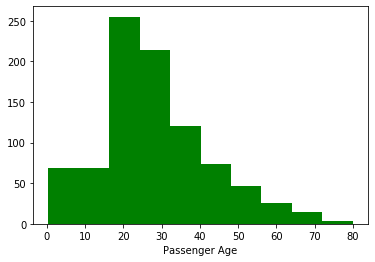

In [26]:
plt.xlabel('Passenger Age')
plt.hist(cleaned_train_copy_2['Age'], color='green') #See the distribution of Passenger Age

In [27]:
#Age classification
infant = range(0, 10)
teenage = range(10, 18)
adult = range(18, 56)
old = range(56, 100)

In [28]:
def AgeClassification(df):
    index = df.index
    AgeDF = pd.DataFrame(index=index, columns=['Age_Class'])
    for i in index:
        if round(df.loc[i, 'Age']) in infant:
            AgeDF.loc[i, 'Age_Class'] = 'infant'
        elif round(df.loc[i, 'Age']) in teenage:
            AgeDF.loc[i, 'Age_Class'] = 'teenage'
        elif round(df.loc[i, 'Age']) in adult:
            AgeDF.loc[i, 'Age_Class'] = 'adult'
        elif round(df.loc[i, 'Age']) in old:
            AgeDF.loc[i, 'Age_Class'] = 'old'
        else:
            print(df.loc[i, 'Age'])
    return AgeDF

In [29]:
AgeDF = AgeClassification(cleaned_train_copy_2)

In [30]:
AgeDF.isna().any()

Age_Class    False
dtype: bool

In [31]:
AgeDF.head(10)

,Age_Class
0,adult
1,adult
2,adult
3,adult
4,adult
5,adult
6,adult
7,infant
8,adult
9,teenage


In [32]:
cleaned_train_copy_2 = cleaned_train_copy_2.join(AgeDF).copy()

In [33]:
cleaned_train_copy_2.groupby(['Sex', 'Age_Class'])['Survived'].value_counts()

Sex     Age_Class  Survived
female  adult      1           157
                   0            50
        infant     1            25
                   0            16
        old        1            16
                   0             1
        teenage    1            35
                   0            14
male    adult      0           403
                   1            80
        infant     1            21
                   0            15
        old        0            28
                   1             4
        teenage    0            22
                   1             4
Name: Survived, dtype: int64

In [34]:
AgeClass_OHE = pd.get_dummies(cleaned_train_copy_2['Age_Class'])

In [35]:
AgeClass_OHE.head()

,adult,infant,old,teenage
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [36]:
cleaned_train_copy_3 = cleaned_train_copy_2.join(AgeClass_OHE).copy()

In [37]:
cleaned_train_copy_3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,first_class,second_class,third_class,female,male,Age_Class,adult,infant,old,teenage
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,1,0,1,adult,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,1,0,0,1,0,adult,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,1,1,0,adult,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,1,0,0,1,0,adult,1,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,1,0,1,adult,1,0,0,0


In [38]:
cleaned_train_copy_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 23 columns):
PassengerId        891 non-null int64
Survived           891 non-null int64
Pclass             891 non-null int64
Name               891 non-null object
Sex                891 non-null object
Age                891 non-null float64
SibSp              891 non-null int64
Parch              891 non-null int64
Ticket             891 non-null object
Fare               891 non-null float64
Cabin              891 non-null object
Embarked           891 non-null object
Passenger_Class    891 non-null object
first_class        891 non-null uint8
second_class       891 non-null uint8
third_class        891 non-null uint8
female             891 non-null uint8
male               891 non-null uint8
Age_Class          891 non-null object
adult              891 non-null uint8
infant             891 non-null uint8
old                891 non-null uint8
teenage            891 non-null uint8
dtypes: fl

In [39]:
cleaned_train_copy_3['Ticket'].value_counts()

1601          7
CA. 2343      7
347082        7
CA 2144       6
347088        6
             ..
244310        1
237668        1
A.5. 18509    1
2697          1
349217        1
Name: Ticket, Length: 681, dtype: int64

In [40]:
cleaned_train_copy_3.groupby('Ticket')['Survived'].value_counts()

Ticket       Survived
110152       1           3
110413       1           2
             0           1
110465       0           2
110564       1           1
                        ..
W./C. 6609   0           1
W.E.P. 5734  0           1
W/C 14208    0           1
WE/P 5735    0           1
             1           1
Name: Survived, Length: 730, dtype: int64

In [41]:
cleaned_train_copy_3['Ticket'].values

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '349909', '347077', '2631', '19950', '330959', '349216',
       'PC 17601', 'PC 17569', '335677', 'C.A. 24579', 'PC 17604',
       '113789', '2677', 'A./5. 2152', '345764', '2651', '7546', '11668',
       '349253', 'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371',
       '14311', '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572',
       '2926', '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651',
       'CA 2144', '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'CA 2144', 'S.O.C. 14879', '2680', '1601', '348123', '349208',
       '374746', '248738', '364516', '345767', '345779', '330932',
       '113059',

In [42]:
"""will categories ticket by 3 types
1. decimal --> decimal number ticket
2. alphanum --> decimal and character ticket
3. character --> character ticket
"""
import re
decimal = re.compile(r'[0-9]+')
alphanum = re.compile(r'[0-9a-zA-Z\s\S]{2, 100}')
character = re.compile(r'[a-zA-Z]+')

In [43]:
def TicketClass(df):
    index = df.index
    TicketCatDF = pd.DataFrame(index=index, columns=['TicketCat'])
    for i in index:
        if decimal.fullmatch(df.loc[i, 'Ticket']):
            TicketCatDF.loc[i, 'TicketCat'] = 'decimal_ticket'
        elif character.fullmatch(df.loc[i, 'Ticket']):
             TicketCatDF.loc[i, 'TicketCat'] = 'character_ticket'
        else:
            TicketCatDF.loc[i, 'TicketCat'] = 'alphanum_ticket'
    return TicketCatDF

In [44]:
TicketCatDF = TicketClass(cleaned_train_copy_3)

In [45]:
TicketCatDF.head(10)

,TicketCat
0,alphanum_ticket
1,alphanum_ticket
2,alphanum_ticket
3,decimal_ticket
4,decimal_ticket
5,decimal_ticket
6,decimal_ticket
7,decimal_ticket
8,decimal_ticket
9,decimal_ticket


In [46]:
TicketCatDF['TicketCat'].value_counts()

decimal_ticket      661
alphanum_ticket     226
character_ticket      4
Name: TicketCat, dtype: int64

In [47]:
cleaned_train_copy_3 = cleaned_train_copy_3.join(TicketCatDF).copy()

In [48]:
cleaned_train_copy_3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,second_class,third_class,female,male,Age_Class,adult,infant,old,teenage,TicketCat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,1,0,1,adult,1,0,0,0,alphanum_ticket
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,1,0,adult,1,0,0,0,alphanum_ticket
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,1,0,adult,1,0,0,0,alphanum_ticket
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,1,0,adult,1,0,0,0,decimal_ticket
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,1,0,1,adult,1,0,0,0,decimal_ticket


In [49]:
TicketCat_OHE = pd.get_dummies(cleaned_train_copy_3['TicketCat'])

In [50]:
TicketCat_OHE.head()

,alphanum_ticket,character_ticket,decimal_ticket
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,1
4,0,0,1


In [51]:
cleaned_train_copy_4 = cleaned_train_copy_3.join(TicketCat_OHE).copy()

In [52]:
cleaned_train_copy_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 27 columns):
PassengerId         891 non-null int64
Survived            891 non-null int64
Pclass              891 non-null int64
Name                891 non-null object
Sex                 891 non-null object
Age                 891 non-null float64
SibSp               891 non-null int64
Parch               891 non-null int64
Ticket              891 non-null object
Fare                891 non-null float64
Cabin               891 non-null object
Embarked            891 non-null object
Passenger_Class     891 non-null object
first_class         891 non-null uint8
second_class        891 non-null uint8
third_class         891 non-null uint8
female              891 non-null uint8
male                891 non-null uint8
Age_Class           891 non-null object
adult               891 non-null uint8
infant              891 non-null uint8
old                 891 non-null uint8
teenage             891 no

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

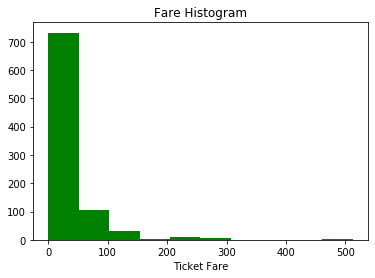

In [53]:
plt.title('Fare Histogram')
plt.xlabel('Ticket Fare')
plt.hist(cleaned_train_copy_4['Fare'], color='g')

In [54]:
cleaned_train_copy_4['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [55]:
cleaned_train_copy_4.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,male,Age_Class,adult,infant,old,teenage,TicketCat,alphanum_ticket,character_ticket,decimal_ticket
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,adult,1,0,0,0,alphanum_ticket,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,adult,1,0,0,0,alphanum_ticket,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,adult,1,0,0,0,alphanum_ticket,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,adult,1,0,0,0,decimal_ticket,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,adult,1,0,0,0,decimal_ticket,0,0,1


In [56]:
#categories ticket from http://www.jamescamerononline.com/TitanicFAQ.htm
first_class_fare = range(150, 513)
second_class_fare = range(60, 150)
third_class_fare = range(0, 60)

In [57]:
index

RangeIndex(start=0, stop=891, step=1)

In [62]:
def FareCat(df):
    index = cleaned_train_copy_4.index
    global FareCatDF
    FareCatDF = pd.DataFrame(columns=['Class_Fare'], index=index)
    for i in index:
        if round(df.loc[i, 'Fare']) in first_class_fare:
            FareCatDF.loc[i, 'Class_Fare'] = 'first_class_fare'
        elif round(df.loc[i, 'Fare']) in second_class_fare:
            FareCatDF.loc[i, 'Class_Fare'] = 'second_class_fare'
        elif round(df.loc[i, 'Fare']) in third_class_fare:
            FareCatDF.loc[i, 'Class_Fare'] = 'third_class_fare'
        else:
            print(df.loc[i, 'Fare'])
    return FareCatDF

In [63]:
FareCat(cleaned_train_copy_4)

,Class_Fare
0,third_class_fare
1,second_class_fare
2,third_class_fare
3,third_class_fare
4,third_class_fare
5,third_class_fare
6,third_class_fare
7,third_class_fare
8,third_class_fare
9,third_class_fare


In [66]:
FareCatDF['Class_Fare'].value_counts()

third_class_fare     769
second_class_fare     93
first_class_fare      29
Name: Class_Fare, dtype: int64

In [67]:
FareCatDF_OHE = pd.get_dummies(FareCatDF)

In [69]:
cleaned_train_copy_4 = cleaned_train_copy_4.join([FareCatDF, FareCatDF_OHE])

In [70]:
cleaned_train_copy_4.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,old,teenage,TicketCat,alphanum_ticket,character_ticket,decimal_ticket,Class_Fare,Class_Fare_first_class_fare,Class_Fare_second_class_fare,Class_Fare_third_class_fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,alphanum_ticket,1,0,0,third_class_fare,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,alphanum_ticket,1,0,0,second_class_fare,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,alphanum_ticket,1,0,0,third_class_fare,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,decimal_ticket,0,0,1,third_class_fare,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,decimal_ticket,0,0,1,third_class_fare,0,0,1


In [71]:
cleaned_train_copy_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 31 columns):
PassengerId                     891 non-null int64
Survived                        891 non-null int64
Pclass                          891 non-null int64
Name                            891 non-null object
Sex                             891 non-null object
Age                             891 non-null float64
SibSp                           891 non-null int64
Parch                           891 non-null int64
Ticket                          891 non-null object
Fare                            891 non-null float64
Cabin                           891 non-null object
Embarked                        891 non-null object
Passenger_Class                 891 non-null object
first_class                     891 non-null uint8
second_class                    891 non-null uint8
third_class                     891 non-null uint8
female                          891 non-null uint8
male              

In [73]:
cleaned_train_copy_4['Cabin'].values

array(['No Cabin', 'C85', 'No Cabin', 'C123', 'No Cabin', 'No Cabin',
       'E46', 'No Cabin', 'No Cabin', 'No Cabin', 'G6', 'C103',
       'No Cabin', 'No Cabin', 'No Cabin', 'No Cabin', 'No Cabin',
       'No Cabin', 'No Cabin', 'No Cabin', 'No Cabin', 'D56', 'No Cabin',
       'A6', 'No Cabin', 'No Cabin', 'No Cabin', 'C23 C25 C27',
       'No Cabin', 'No Cabin', 'No Cabin', 'B78', 'No Cabin', 'No Cabin',
       'No Cabin', 'No Cabin', 'No Cabin', 'No Cabin', 'No Cabin',
       'No Cabin', 'No Cabin', 'No Cabin', 'No Cabin', 'No Cabin',
       'No Cabin', 'No Cabin', 'No Cabin', 'No Cabin', 'No Cabin',
       'No Cabin', 'No Cabin', 'No Cabin', 'D33', 'No Cabin', 'B30',
       'C52', 'No Cabin', 'No Cabin', 'No Cabin', 'No Cabin', 'No Cabin',
       'B28', 'C83', 'No Cabin', 'No Cabin', 'No Cabin', 'F33',
       'No Cabin', 'No Cabin', 'No Cabin', 'No Cabin', 'No Cabin',
       'No Cabin', 'No Cabin', 'No Cabin', 'F G73', 'No Cabin',
       'No Cabin', 'No Cabin', 'No Cabin', 'No C

In [78]:
"""Cabin classification
https://www.kaggle.com/c/titanic/discussion/4693
"""
import re
def CabinClass(df):
    index = cleaned_train_copy_4.index
    global CabClassDF
    CabClassDF = pd.DataFrame(index=index, columns=['Cab_Class'])
    for i in index:
        if re.match(r'A', df.loc[i, 'Cabin']):
            CabClassDF.loc[i, 'Cab_Class'] = 'A_deck'
        elif re.match(r'B', df.loc[i, 'Cabin']):
            CabClassDF.loc[i, 'Cab_Class'] = 'B_deck'
        elif re.match(r'C', df.loc[i, 'Cabin']):
            CabClassDF.loc[i, 'Cab_Class'] = 'C_deck'
        elif re.match(r'D', df.loc[i, 'Cabin']):
            CabClassDF.loc[i, 'Cab_Class'] = 'D_deck'
        elif re.match(r'E', df.loc[i, 'Cabin']):
            CabClassDF.loc[i, 'Cab_Class'] = 'E_deck'
        elif re.match(r'F', df.loc[i, 'Cabin']):
            CabClassDF.loc[i, 'Cab_Class'] = 'F_deck'
        elif re.match(r'G', df.loc[i, 'Cabin']):
            CabClassDF.loc[i, 'Cab_Class'] = 'G_deck'
        else:
            CabClassDF.loc[i, 'Cab_Class'] = 'low_deck'
    return CabClassDF.head(10)

In [79]:
CabinClass(cleaned_train_copy_4)

,Cab_Class
0,low_deck
1,C_deck
2,low_deck
3,C_deck
4,low_deck
5,low_deck
6,E_deck
7,low_deck
8,low_deck
9,low_deck


In [83]:
CabClassDF['Cab_Class'].value_counts()

low_deck    688
C_deck       59
B_deck       47
D_deck       33
E_deck       32
A_deck       15
F_deck       13
G_deck        4
Name: Cab_Class, dtype: int64

In [84]:
CabClassDF_OHE = pd.get_dummies(CabClassDF)

In [85]:
CabClassDF_OHE.head(10)

,Cab_Class_A_deck,Cab_Class_B_deck,Cab_Class_C_deck,Cab_Class_D_deck,Cab_Class_E_deck,Cab_Class_F_deck,Cab_Class_G_deck,Cab_Class_low_deck
0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,1
6,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,1


In [87]:
cleaned_train_copy_4 = cleaned_train_copy_4.join([CabClassDF, CabClassDF_OHE]).copy()

In [88]:
cleaned_train_copy_4.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Class_Fare_third_class_fare,Cab_Class,Cab_Class_A_deck,Cab_Class_B_deck,Cab_Class_C_deck,Cab_Class_D_deck,Cab_Class_E_deck,Cab_Class_F_deck,Cab_Class_G_deck,Cab_Class_low_deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,low_deck,0,0,0,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,C_deck,0,0,1,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,low_deck,0,0,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,1,C_deck,0,0,1,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,low_deck,0,0,0,0,0,0,0,1
5,6,0,3,"Moran, Mr. James",male,19.0,0,0,330877,8.4583,...,1,low_deck,0,0,0,0,0,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,1,E_deck,0,0,0,0,1,0,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,...,1,low_deck,0,0,0,0,0,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,...,1,low_deck,0,0,0,0,0,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,...,1,low_deck,0,0,0,0,0,0,0,1


In [90]:
cleaned_train_copy_4['Embarked'].value_counts()

S              644
C              168
Q               77
No Embarked      2
Name: Embarked, dtype: int64

In [91]:
Embarked_OHE = pd.get_dummies(cleaned_train_copy_4['Embarked'])

In [92]:
Embarked_OHE.head()

,C,No Embarked,Q,S
0,0,0,0,1
1,1,0,0,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [93]:
cleaned_train_copy_4 = cleaned_train_copy_4.join(Embarked_OHE).copy()

In [94]:
cleaned_train_copy_4.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Passenger_Class',
       'first_class', 'second_class', 'third_class', 'female', 'male',
       'Age_Class', 'adult', 'infant', 'old', 'teenage', 'TicketCat',
       'alphanum_ticket', 'character_ticket', 'decimal_ticket', 'Class_Fare',
       'Class_Fare_first_class_fare', 'Class_Fare_second_class_fare',
       'Class_Fare_third_class_fare', 'Cab_Class', 'Cab_Class_A_deck',
       'Cab_Class_B_deck', 'Cab_Class_C_deck', 'Cab_Class_D_deck',
       'Cab_Class_E_deck', 'Cab_Class_F_deck', 'Cab_Class_G_deck',
       'Cab_Class_low_deck', 'C', 'No Embarked', 'Q', 'S'],
      dtype='object')

In [101]:
modified_data = cleaned_train_copy_4[['PassengerId', 'Survived', 'first_class', 'second_class', 'third_class', \
                                     'female', 'male', 'adult', 'infant', 'old', 'teenage', 'alphanum_ticket', \
                                     'character_ticket', 'decimal_ticket', 'Class_Fare_first_class_fare', 'Class_Fare_second_class_fare',\
                                     'Class_Fare_third_class_fare', 'Cab_Class_A_deck', 'Cab_Class_B_deck', 'Cab_Class_C_deck', 'Cab_Class_D_deck',\
                                     'Cab_Class_E_deck', 'Cab_Class_F_deck', 'Cab_Class_G_deck', 'Cab_Class_low_deck', 'C', 'No Embarked', 'Q', 'S']]

In [102]:
modified_data.head()

,PassengerId,Survived,first_class,second_class,third_class,female,male,adult,infant,old,...,Cab_Class_C_deck,Cab_Class_D_deck,Cab_Class_E_deck,Cab_Class_F_deck,Cab_Class_G_deck,Cab_Class_low_deck,C,No Embarked,Q,S
0,1,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,1
1,2,1,1,0,0,1,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
2,3,1,0,0,1,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,4,1,1,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,5,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,1


In [103]:
modified_data.to_csv('train_modified_data.csv')